In [1]:
import os
import re
import numpy as np
import pandas as pd
from pandas import datetime
import geopandas as gpd
import sklearn
import ipywidgets as widgets

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline
plt.style.use('ggplot')

In [2]:
csv = '/Users/nonoumasy/Dropbox/reference/data/Parking_Citations.csv'
df = pd.read_csv(csv)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
#column cleanup
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') 

#keep these features
df = df[['issue_date','issue_time', 'rp_state_plate', 'plate_expiry_date', 'make', 'body_style', 'location', 'violation_description', 'fine_amount', 'latitude', 'longitude']]  #use only these columns

#cleans up whitespaces on address
df.location = df.location.str.lstrip().str.rstrip().str.strip()


#cleanup and process datatime data
df.issue_time = df.issue_time.astype(str)
pattern = '\.\d'
df.issue_time = df.issue_time.str.replace(pat=pattern, repl='', regex=True)
df.issue_time = df.issue_time.str.zfill(4)
df.issue_time = df.issue_time.str.ljust(6, fillchar='0')
df.issue_time = df.issue_time.str.slice(0,2) + ':' + df.issue_time.str.slice(2,4) + ":" + df.issue_time.str.slice(4,6)

#fill missing date values using ffill method
df.issue_date = df.issue_date.fillna(method='ffill')

#replace missing time values with replace method
df.issue_time = df.issue_time.str.replace('0n:an:00', '00:00:00')

#combine date and time and convert to datetime series
df['date_time'] = df.issue_date + df.issue_time
df.date_time = pd.to_datetime(df.date_time, format='%m/%d/%Y%H:%M:%S')

df['year'] = df.date_time.dt.year
df['month'] = df.date_time.dt.month
df['day_of_week'] = df.date_time.dt.dayofweek
df['hour'] = df.date_time.dt.hour


df['year'] = df.date_time.dt.year
df['month'] = df.date_time.dt.month
df['day_of_week'] = df.date_time.dt.dayofweek
df['hour'] = df.date_time.dt.hour






Text(0, 0.5, 'Parking Tickets')

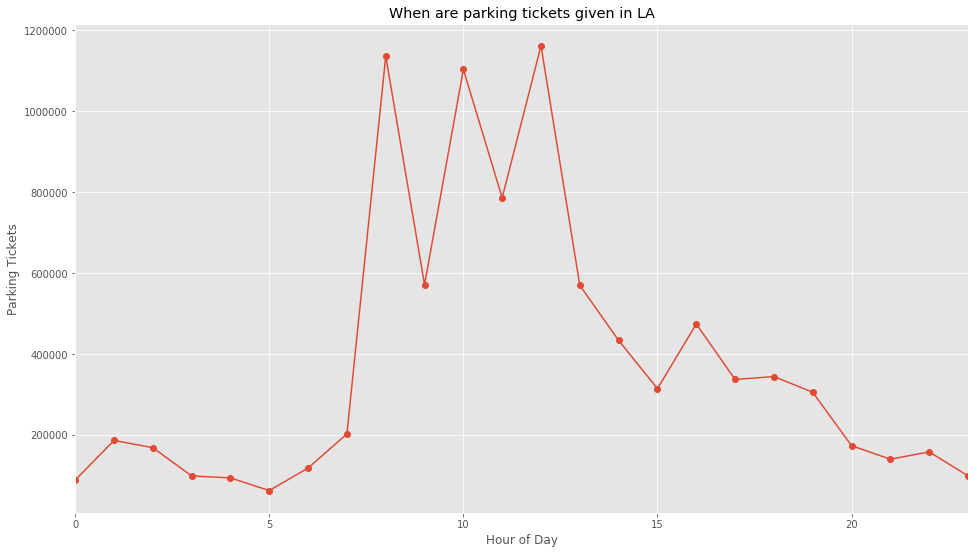

In [5]:
df.hour.value_counts().sort_index().plot(figsize=(16,9), marker='o')
plt.title('When are parking tickets given in LA')
plt.xlabel('Hour of Day')
plt.ylabel('Parking Tickets')

In [ ]:
df.groupby('year').fine_amount.sum().sort_index(ascending=False)[1:5].plot(kind='bar', figsize=(16,9), width=20)
plt.title('Revenue generated by Parking Violations in Los Angeles')
plt.xlabel('Year')
plt.ylabel('Parking Citation Revenue')

NO PARK/STREET CLEAN      0.289217
METER EXP.                0.173695
RED ZONE                  0.074947
PREFERENTIAL PARKING      0.068971
DISPLAY OF TABS           0.061508
NO PARKING                0.044594
DISPLAY OF PLATES         0.027653
WHITE ZONE                0.022371
PARKED OVER TIME LIMIT    0.018177
NO STOP/STANDING          0.018008
Name: violation_description, dtype: float64


Text(0, 0.5, 'Violation')

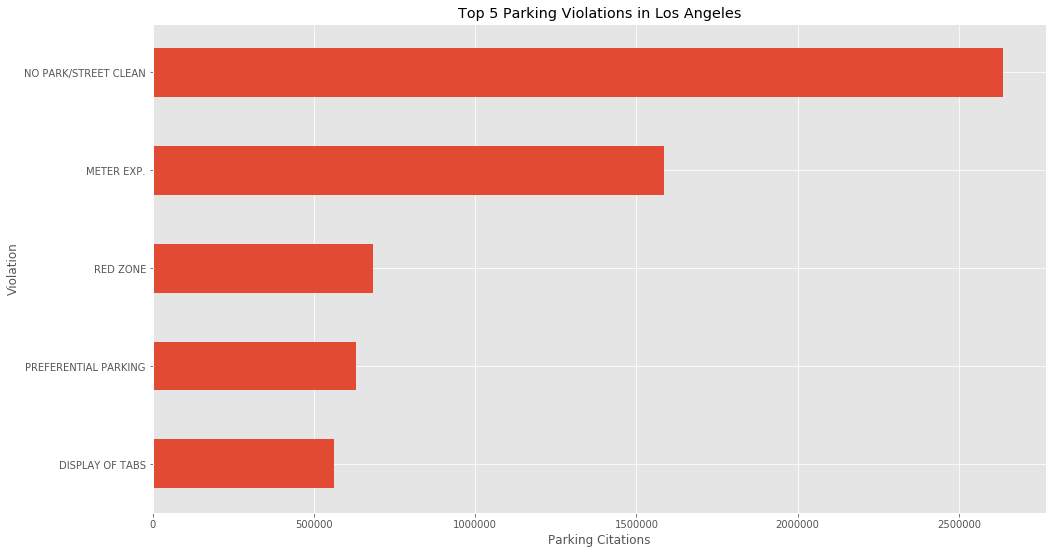

In [13]:
print(df.violation_description.value_counts(normalize=True)[:10].sort_values(ascending=False))
df.violation_description.value_counts()[:5].sort_values(ascending=True).plot(kind='barh', figsize=(16,9))
plt.title('Top 5 Parking Violations in Los Angeles')
plt.xlabel('Parking Citations')
plt.ylabel('Violation')

In [12]:
df.location.value_counts()[:10]

1301 ELECTRIC AVE       9993
11600 SAN VICENTE BL    7167
101 LARCHMONT BL N      7154
1600 IRVING TABOR CT    6012
2377 MIDVALE AVE        5940
4301 TUJUNGA AV         5405
5901 98TH ST W          5265
7000 HAWTHORN AVE       5198
2800 E OBSERVATORY      5081
12100 VENTURA BL        5071
Name: location, dtype: int64